Import necessary libraries

In [1]:
from IPython.display import display, Math, Latex

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

### Handling Imbalanced Data

Imbalanced datasets are those where one class is very less represented than the other class. This kind of data results in less efficient ML algorithm.

There are two main approaches to handle imbalanced data:
* Undersampling
* Oversampling

[Image Source](https://miro.medium.com/max/1400/0*mOgypphrofDS9Z32.png)

![Image Source](https://miro.medium.com/max/1400/0*mOgypphrofDS9Z32.png)

We will demonstrate how to handle imbalance with the help of **wine quality dataset** that we have used earlier.

In [2]:
wine_data = pd.read_csv(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')

wine_data.shape

(1599, 12)

In [3]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
wine_data.quality.value_counts(ascending=True)

3     10
8     18
4     53
7    199
6    638
5    681
Name: quality, dtype: int64

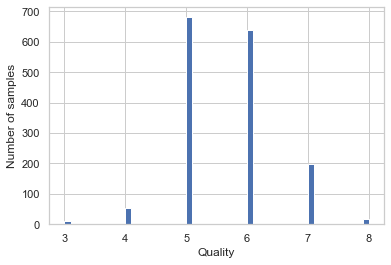

In [5]:
# display the histograms of the target variable 'quality'

wine_data['quality'].hist(bins=50)
plt.xlabel('Quality')
plt.ylabel('Number of samples')
plt.show()

### **1. Undersampling**

Undersampling refers to sampling from the majority class in order to keep only a part of these data points.

It may be carried out using **RandomUnderSampler** class from **imblearn** library.

In [6]:
from imblearn.under_sampling import RandomUnderSampler

class 3: (10, 12)
class 4: (53, 12)
class 5: (681, 12)
class 6: (638, 12)
class 7: (199, 12)
class 8: (18, 12)


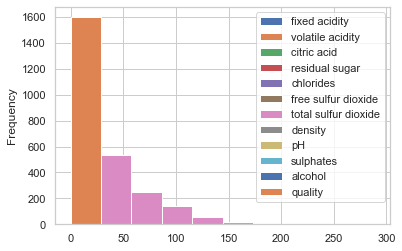

In [7]:
#class
class_count_3, class_count_4, class_count_5, class_count_6, class_count_7, class_count_8 = wine_data['quality'].value_counts()

# separate class
class_3 = wine_data[wine_data['quality'] == 3]
class_4 = wine_data[wine_data['quality'] == 4]
class_5 = wine_data[wine_data['quality'] == 5]
class_3 = wine_data[wine_data['quality'] == 3]
class_6 = wine_data[wine_data['quality'] == 6]
class_7 = wine_data[wine_data['quality'] == 7]
class_8 = wine_data[wine_data['quality'] == 8]


# print the shape of the class
print('class 3:', class_3.shape)
print('class 4:', class_4.shape)
print('class 5:', class_5.shape)
print('class 6:', class_6.shape)
print('class 7:', class_7.shape)
print('class 8:', class_8.shape)

wine_data.plot.hist()
plt.show()


In [8]:
# It allows you to count the items in an iterable list.
from collections import Counter

X = wine_data.drop(['quality'],axis=1)
y = wine_data['quality']

In [9]:
undersampler = RandomUnderSampler(random_state =0)
X_rus, y_rus = undersampler.fit_resample(X,y) 

print('Original dataset shape : ',y.shape)
print('Resampled dataset shape : ', y_rus.shape)

print()
print(Counter(y))
print(Counter(y_rus))


Original dataset shape :  (1599,)
Resampled dataset shape :  (60,)

Counter({5: 681, 6: 638, 7: 199, 4: 53, 8: 18, 3: 10})
Counter({3: 10, 4: 10, 5: 10, 6: 10, 7: 10, 8: 10})


The class with the least number of samples is '3'. 

Hence all the other class samples are reduced to the number of samples in the least class.

### **2. Oversampling**

Oversampling refers to replicating some points from the minority class in order to increase the cardinality of the minority class. 

This might consist of either replicating or generating synthetic data for the minority class.

It may be carried out using RandomOverSampler class from imblearn library.

In [10]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X, y)

print('Original dataset shape : ', y.shape)
print('Resampled dataset shape : ', y_ros.shape)

print()
print(Counter(y))
print(Counter(y_ros))


Original dataset shape :  (1599,)
Resampled dataset shape :  (4086,)

Counter({5: 681, 6: 638, 7: 199, 4: 53, 8: 18, 3: 10})
Counter({5: 681, 6: 681, 7: 681, 4: 681, 8: 681, 3: 681})


In [11]:
print('New random points generated with RandomOverSampler : ',X_ros.shape[0] - X.shape[0])

New random points generated with RandomOverSampler :  2487


The class with the majority number of samples is '5'. Hence all the other class samples that are lesser than this class count are newly sampled to the number of samples in the majority class.

#### **Oversampling using SMOTE**

SMOTE (Synthetic Minority Oversampling Technique) is a popular technique for over sampling. It is available under **imblean** library.


In [12]:
from imblearn.over_sampling import SMOTE

oversampler = SMOTE()
X_smote, y_smote = oversampler.fit_resample(X, y)

Counter(y_smote)

Counter({5: 681, 6: 681, 7: 681, 4: 681, 8: 681, 3: 681})

In [13]:
print('New random points generated with SMOTE : ', X_ros.shape[0] - X.shape[0])

New random points generated with SMOTE :  2487


Types of SMOTE:

* Borderline SMOTE

* Borderline-SMOTE SVM

* Adaptive Synthetic Sampling(ADASYN)
